In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [3]:
train_dir = r"D:\edge Downloads\dog breed\train"
test_dir = r"D:\edge Downloads\dog breed\test"
val_dir = r"D:\edge Downloads\dog breed\valid"
img_size = 128

In [5]:
def create_data_generators(train_dir, val_dir, test_dir, img_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )
    
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical'
    )

    val_generator = test_val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_val_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical'
    )
    
    return train_generator, val_generator, test_generator


train_generator, val_generator, test_generator = create_data_generators(train_dir, val_dir, test_dir, img_size)


Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # This allows PIL to load truncated images

# Image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)


Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [9]:
import os
from PIL import Image

def remove_corrupted_images(image_folder):
    for filename in os.listdir(image_folder):
        file_path = os.path.join(image_folder, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if the image is corrupted
        except (IOError, SyntaxError) as e:
            print(f"Deleting corrupted image: {file_path}")
            try:
                os.remove(file_path)
            except PermissionError:
                print(f"Permission denied: {file_path}, skipping.")
            continue
        except PermissionError:
            print(f"Permission denied: {file_path}, skipping.")

remove_corrupted_images(train_dir)
remove_corrupted_images(val_dir)


Deleting corrupted image: D:\edge Downloads\dog breed\train\Afghan
Permission denied: D:\edge Downloads\dog breed\train\Afghan, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\African Wild Dog
Permission denied: D:\edge Downloads\dog breed\train\African Wild Dog, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\Airedale
Permission denied: D:\edge Downloads\dog breed\train\Airedale, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\American Hairless
Permission denied: D:\edge Downloads\dog breed\train\American Hairless, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\American Spaniel
Permission denied: D:\edge Downloads\dog breed\train\American Spaniel, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\Basenji
Permission denied: D:\edge Downloads\dog breed\train\Basenji, skipping.
Deleting corrupted image: D:\edge Downloads\dog breed\train\Basset
Permission denied: D:\edge Downloads\

In [11]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound', 'French Bulldog', 'German Sheperd', 'Golden Retriever', 'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael', 'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor', 'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese', 'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull', 'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler', 'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei', 'Shiba Inu', 'Shih-Tzu', 'Siberian Husky', 'Vizsla', 'Yorkie']


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_generator)

D:\users\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\users\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 826ms/step - accuracy: 0.0210 - loss: 4.2433 - val_accuracy: 0.0200 - val_loss: 4.1521
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 520ms/step - accuracy: 0.0337 - loss: 4.1364 - val_accuracy: 0.0514 - val_loss: 3.9828
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 518ms/step - accuracy: 0.0458 - loss: 3.9909 - val_accuracy: 0.0657 - val_loss: 3.8336
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 503ms/step - accuracy: 0.0549 - loss: 3.8836 - val_accuracy: 0.0686 - val_loss: 3.8060
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 558ms/step - accuracy: 0.0698 - loss: 3.8091 - val_accuracy: 0.0843 - val_loss: 3.7430
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 695ms/step - accuracy: 0.0771 - loss: 3.7674 - val_accuracy: 0.0986 - val_loss: 3.6133
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 631ms/step - accuracy: 0.0880 - loss: 3.7084 - val_accuracy: 0.1100 - val_loss: 3.5140
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 621ms/step - accuracy: 0.0988 - loss: 

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    r"D:\edge Downloads\dog breed\train",
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    r"D:\edge Downloads\dog breed\valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 73s 287ms/step - accuracy: 0.0214 - loss: 4.2472 - val_accuracy: 0.0402 - val_loss: 4.1965
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.0000e+00 - loss: 4.2579 - val_accuracy: 0.0357 - val_loss: 4.1918
Epoch 3/50


D:\users\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


248/248 ━━━━━━━━━━━━━━━━━━━━ 69s 278ms/step - accuracy: 0.0272 - loss: 4.1788 - val_accuracy: 0.0417 - val_loss: 4.0552
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.0000e+00 - loss: 4.1118 - val_accuracy: 0.0357 - val_loss: 4.0752
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 72s 289ms/step - accuracy: 0.0532 - loss: 4.0897 - val_accuracy: 0.0714 - val_loss: 3.9363
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0312 - loss: 4.1025 - val_accuracy: 0.1071 - val_loss: 3.7801
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 70s 281ms/step - accuracy: 0.0423 - loss: 4.0360 - val_accuracy: 0.0714 - val_loss: 3.8803
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.0312 - loss: 3.9809 - val_accuracy: 0.1429 - val_loss: 3.7517
Epoch 9/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 73s 294ms/step - accuracy: 0.0555 - loss: 3.9726 - val_accuracy: 0.0952 - val_loss: 3.8209
Epoch 10/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.0625 - loss: 4.0438 - va

In [15]:
model.save('cnn_multi_dog.keras')

In [16]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.1307 - loss: 3.5490
Test Accuracy: 13.00%


In [30]:
import cv2
def predict_breed(model,img_path, img_size, class_names):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size)) /255.0
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    return class_names[predicted_label]

img_path = r"D:\edge Downloads\dog breed\train\Shih-Tzu\176.jpg"
preicted_breed= predict_breed(model, img_path,img_size,class_names)
print(f"Predicted breed: {preicted_breed}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted breed: Dalmation


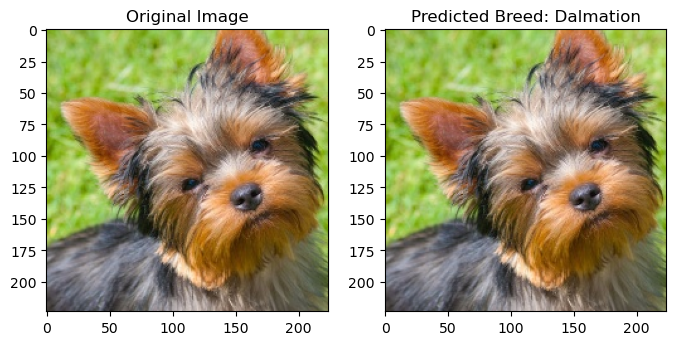

In [32]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Breed: {preicted_breed}")
plt.show()